### Computer Vision for Images and Video (TC4033 - Group 10)

- **School**: School of Engineering and Sciences, Tecnológico de Monterrey
- **Lead Professor**: Dr. Gilberto Ochoa Ruiz
- **Assistant Professor**: MIP Ma. del Refugio Melendez Alfaro
- **Tutor Professor**: Iván Reyes Amezcua
- **Team 5**:
  - Benjamin Cisneros Barraza - A01796323
  - Jonatan Israel Meza Mendoza - A01275322
  - Carlos Pano Hernández - A01066264
  - Edgar Omar Cruz Mendoza - A01795590
- **Date**: Sunday, September 21th, 2025


## Importing Libraries <a class="anchor" id="libraries" ></a>

In [1]:
# Install libraries
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Loading Images <a class="anchor" id="loading"></a>

In [2]:
# Load images
img1 = mpimg.imread('data/img1.jpg')
img2 = mpimg.imread('data/img2.jpg')
img3 = mpimg.imread('data/img3.jpg')

print('Image 1 shape:', img1.shape)
print('Image 2 shape:', img2.shape)
print('Image 3 shape:', img3.shape)

Image 1 shape: (3464, 4618, 3)
Image 2 shape: (3024, 4032, 3)
Image 3 shape: (4032, 3024, 3)


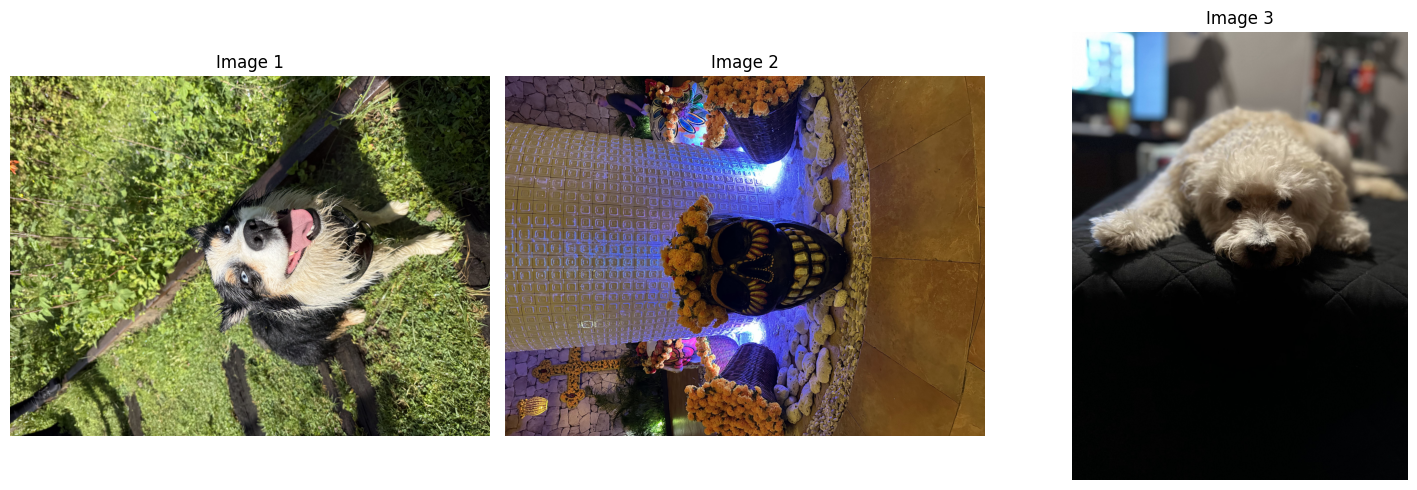

In [3]:
# Display the selected images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img1)
axes[0].set_title('Image 1')
axes[0].axis('off')

axes[1].imshow(img2)
axes[1].set_title('Image 2')
axes[1].axis('off')

axes[2].imshow(img3)
axes[2].set_title('Image 3')
axes[2].axis('off')

plt.tight_layout()
plt.show()

### Exercise 1
Pixel-wise photometric transformations are essential for data augmentation and controlled intensity manipulation.

- Logarithmic transform: Expands dark intensities and compresses bright ones, useful for revealing detail in shadows.
- Contrast stretching (min–max/percentile): Linearly maps input intensity range to the full display range, boosting global contrast.
- Histogram equalization: Redistributes intensities to flatten the histogram and enhance contrast, especially in low-contrast images.

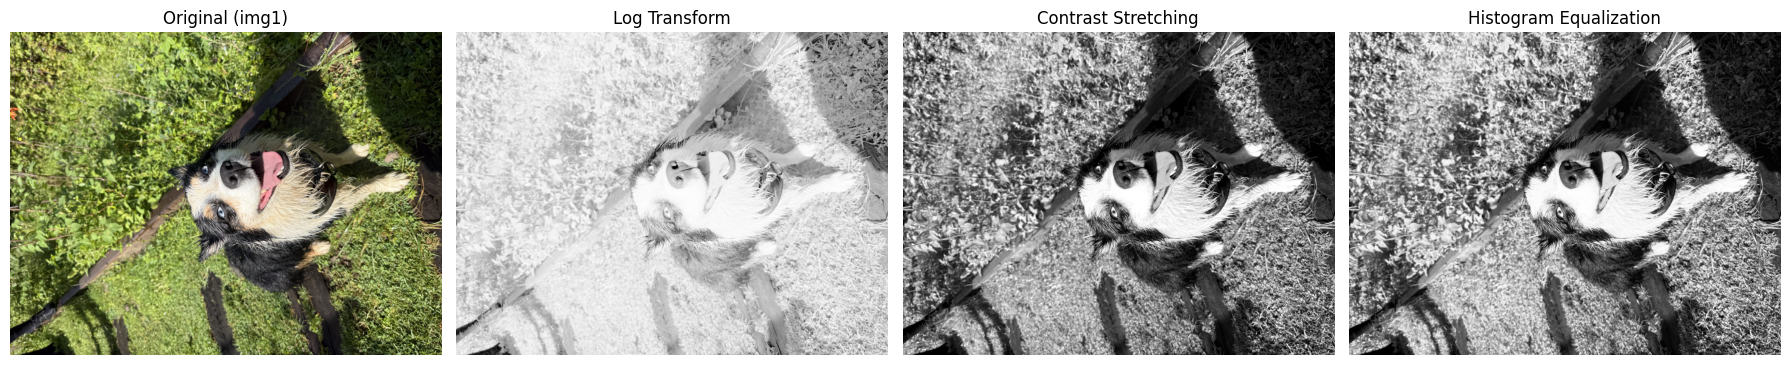

In [4]:
# Ensure img1 is uint8 RGB for OpenCV ops
if img1.dtype != np.uint8:
    img1_u8 = (cv2.normalize(img1, None, 0, 255, cv2.NORM_MINMAX)).astype(np.uint8)
else:
    img1_u8 = img1

# Convert to grayscale for histogram-based ops
img1_gray = cv2.cvtColor(img1_u8, cv2.COLOR_RGB2GRAY)

# 1) Logarithmic transform (on grayscale)
c_log = 255.0 / np.log1p(255.0)
img_log = (c_log * np.log1p(img1_gray.astype(np.float32))).clip(0, 255).astype(np.uint8)

# 2) Contrast stretching using percentiles to avoid outliers
p_low, p_high = np.percentile(img1_gray, (2, 98))
if p_high <= p_low:
    p_low, p_high = img1_gray.min(), img1_gray.max()
img_cs = np.clip((img1_gray - p_low) * (255.0 / max(1.0, (p_high - p_low))), 0, 255).astype(np.uint8)

# 3) Histogram equalization
img_eq = cv2.equalizeHist(img1_gray)

# Display results
fig, axes = plt.subplots(1, 4, figsize=(18, 5))
axes[0].imshow(img1, cmap='gray' if img1.ndim == 2 else None)
axes[0].set_title('Original (img1)')
axes[0].axis('off')

axes[1].imshow(img_log, cmap='gray')
axes[1].set_title('Log Transform')
axes[1].axis('off')

axes[2].imshow(img_cs, cmap='gray')
axes[2].set_title('Contrast Stretching')
axes[2].axis('off')

axes[3].imshow(img_eq, cmap='gray')
axes[3].set_title('Histogram Equalization')
axes[3].axis('off')

plt.tight_layout()
plt.show()

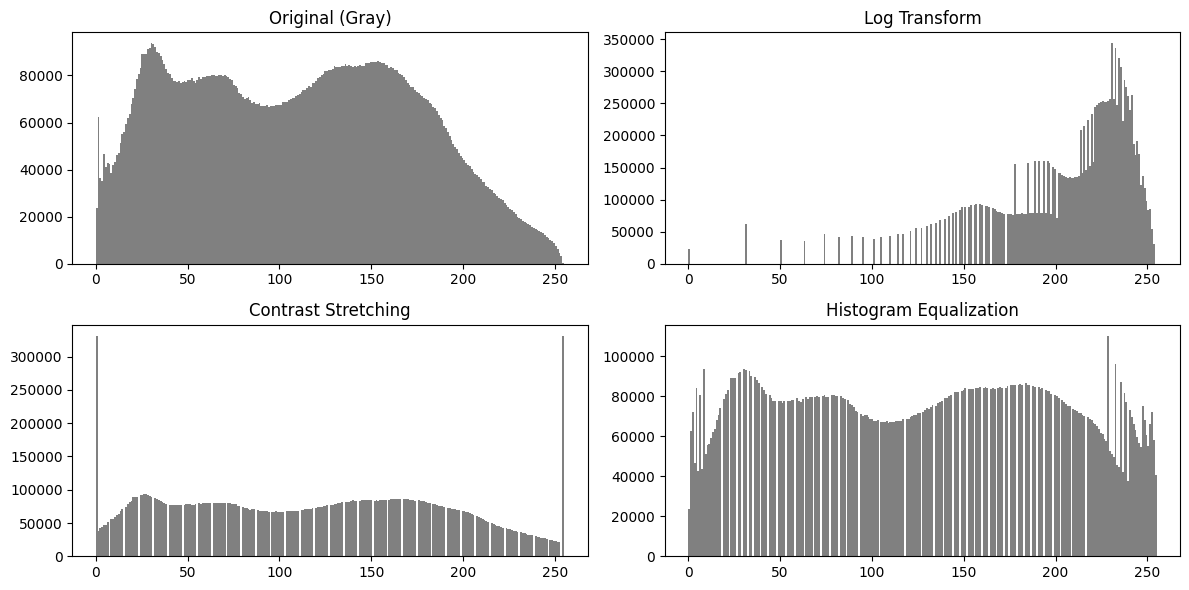

In [5]:
# Compare histograms of grayscale transforms
plt.figure(figsize=(12, 6))

# Original grayscale
plt.subplot(2, 2, 1)
plt.hist(img1_gray.ravel(), bins=256, range=(0, 255), color='gray')
plt.title('Original (Gray)')

# Log transform
plt.subplot(2, 2, 2)
plt.hist(img_log.ravel(), bins=256, range=(0, 255), color='gray')
plt.title('Log Transform')

# Contrast stretching
plt.subplot(2, 2, 3)
plt.hist(img_cs.ravel(), bins=256, range=(0, 255), color='gray')
plt.title('Contrast Stretching')

# Histogram equalization
plt.subplot(2, 2, 4)
plt.hist(img_eq.ravel(), bins=256, range=(0, 255), color='gray')
plt.title('Histogram Equalization')

plt.tight_layout()
plt.show()

### Exercise 2
Image negative as a diagnostic. Your task:
- Choose one real-world workflow where inversion provides measurable benefit (e.g., banknote forensics, radiology film enhancement, document forensics).
- Explain which structures/features become more discriminative after inversion and why (refer to intensity ranges and contrast distribution).
- Provide a short demo on your data and compare original vs. negative views and histograms.

----

#### Credit card fraud detection and counterfeit banknotes
Image inversion can reveal **anomalies** in holograms or in embossed/printed regions that may indicate tampering. It also enhances security features such as threads and watermarks that become more visible when intensities are inverted.

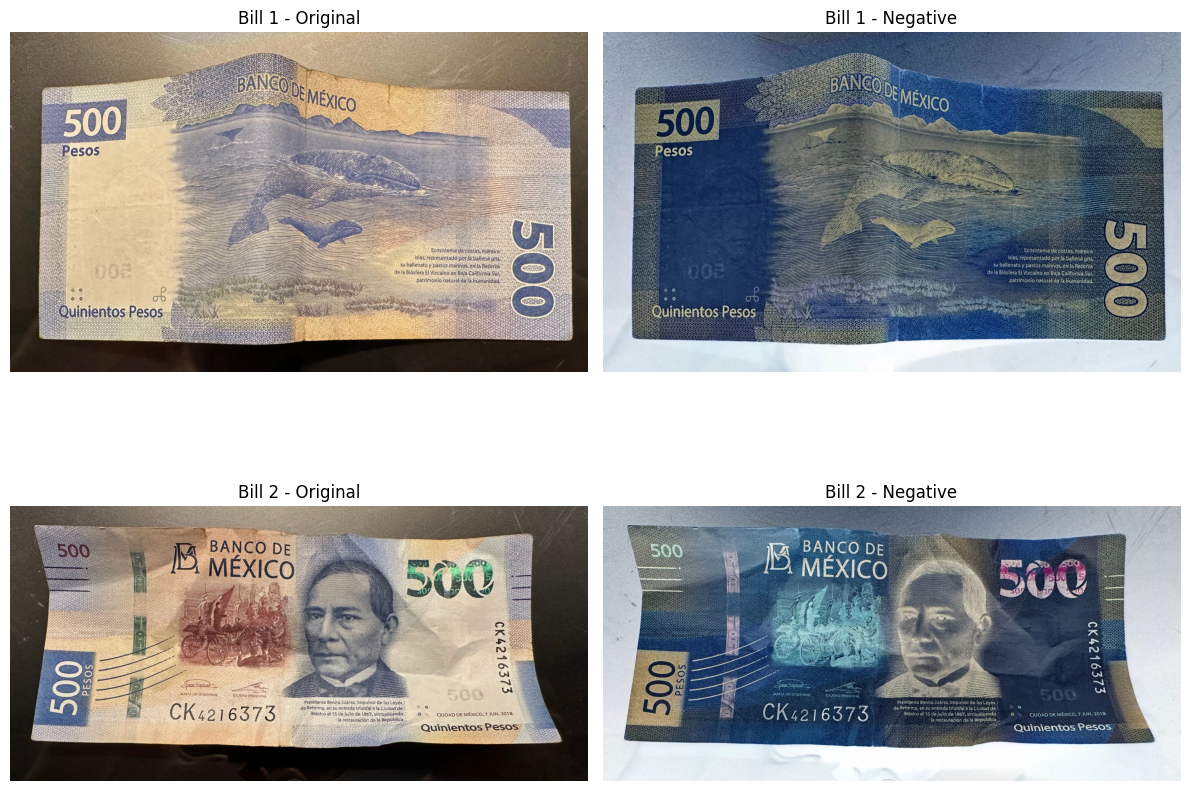

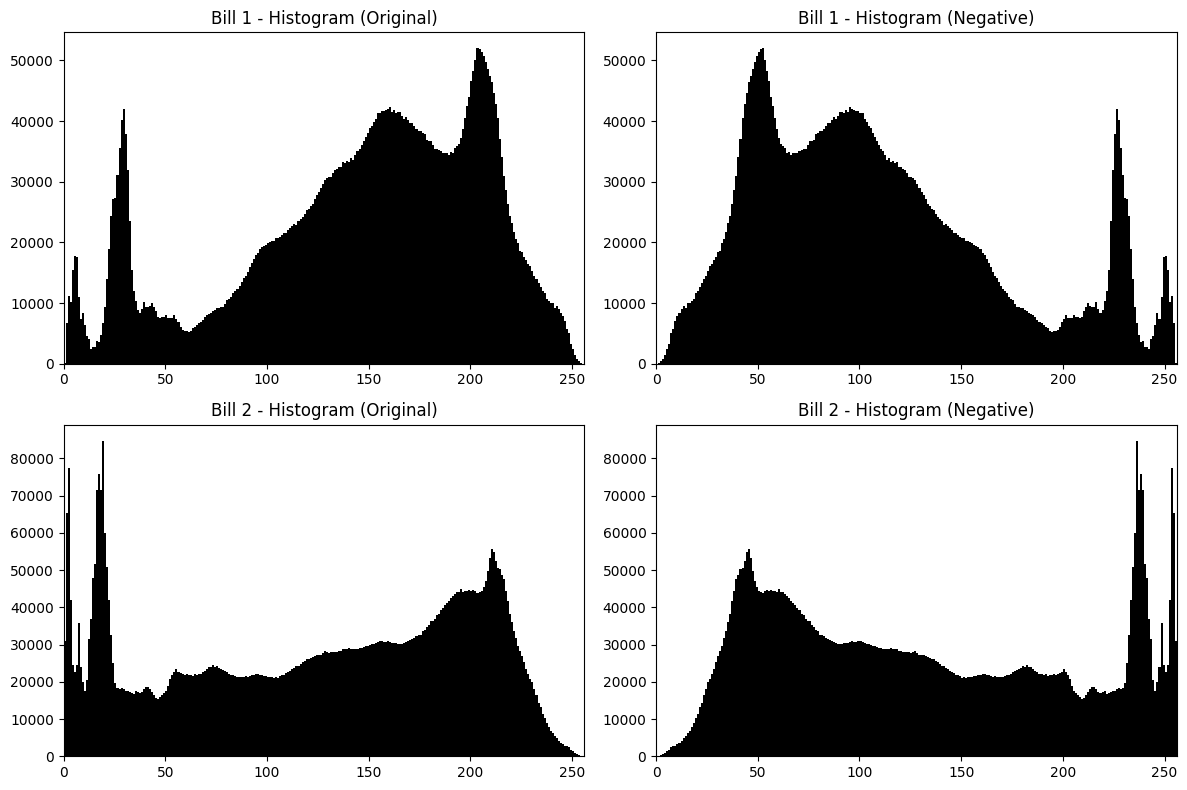

In [6]:
bill1 = mpimg.imread('data/billete-original/img1.jpg')
bill2 = mpimg.imread('data/billete-original/img2.jpg')

neg_bill1 = cv2.bitwise_not(bill1)
neg_bill2 = cv2.bitwise_not(bill2)

# Show in a 2x2 grid: original and negative for each bill
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(bill1)
axes[0, 0].set_title('Bill 1 - Original')
axes[0, 0].axis('off')

axes[0, 1].imshow(neg_bill1)
axes[0, 1].set_title('Bill 1 - Negative')
axes[0, 1].axis('off')

axes[1, 0].imshow(bill2)
axes[1, 0].set_title('Bill 2 - Original')
axes[1, 0].axis('off')

axes[1, 1].imshow(neg_bill2)
axes[1, 1].set_title('Bill 2 - Negative')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

# Grayscale histogram for each bill and its negative
def plot_gray_hist(ax, image, title):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    ax.hist(gray.ravel(), bins=256, range=(0,256), color='black')
    ax.set_title(title)
    ax.set_xlim(0,256)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

plot_gray_hist(axes[0, 0], bill1, 'Bill 1 - Histogram (Original)')
plot_gray_hist(axes[0, 1], neg_bill1, 'Bill 1 - Histogram (Negative)')
plot_gray_hist(axes[1, 0], bill2, 'Bill 2 - Histogram (Original)')
plot_gray_hist(axes[1, 1], neg_bill2, 'Bill 2 - Histogram (Negative)')

plt.tight_layout()
plt.show()

### Justification and Demonstration
The use of image inversion for counterfeit banknote analysis is justified by how this technique highlights security features that are difficult to see with the naked eye. Authentic banknotes contain watermarks, security threads, and microprinting designed to be subtle and hard to replicate.

By inverting image colors, these security elements become more evident. For example, a watermark—an area where the paper is thinner and appears brighter when held against the light—will appear as a dark shape in the inverted image. Similarly, a security thread or band that is nearly invisible on the normal bill often appears as a high-contrast line in the negative. This enhanced contrast makes it easier for computer vision systems and detection machines to identify and validate these features, enabling fast and accurate verification of the banknote's authenticity.

### Exercise 3
Gamma correction for dynamic range shaping. Your task:
- Identify one use-case where non-linear intensity mapping helps reveal detail (e.g., astronomy, medical imaging, low-light photography).
- Justify your chosen gamma values with respect to the histogram (gamma < 1 brightens shadows; gamma > 1 darkens highlights and can suppress background noise).
- Provide a small grid comparing multiple gamma values and discuss which best enhances the target structures.

----

#### Astronomy
In telescope imagery, gamma correction helps highlight low-luminance celestial objects (nebulae, distant galaxies) by boosting darker intensities without saturating bright stars.

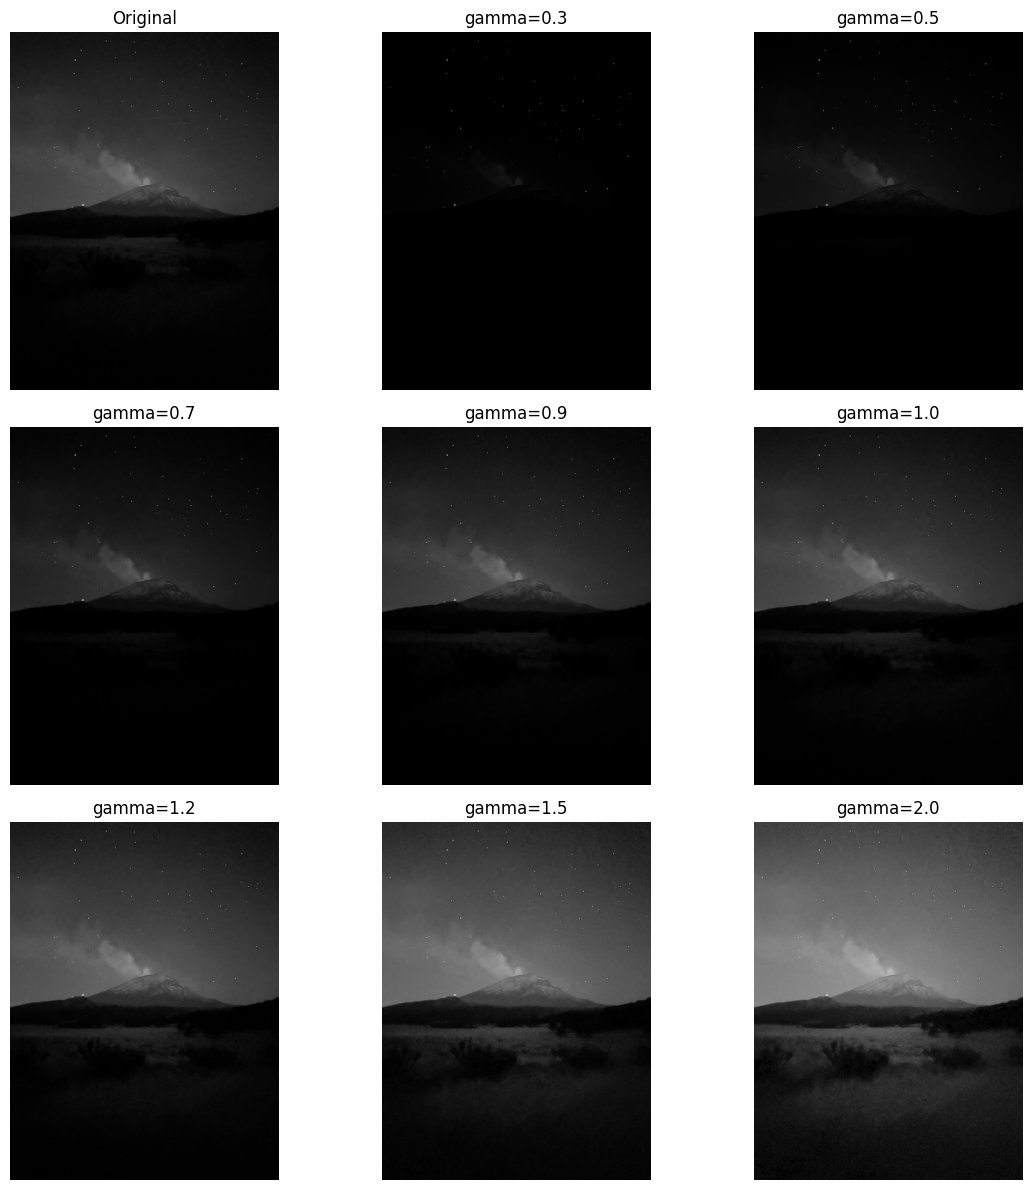

In [7]:
# Compare multiple gamma values to highlight stars in the night sky
# gamma < 1 brightens shadows; gamma > 1 darkens and may reduce background noise

imgPopo = cv2.imread('data/ascensoPopo/img1.jpg', cv2.IMREAD_GRAYSCALE)

def apply_gamma(image_gray, gamma):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(256)]).astype("uint8")
    return cv2.LUT(image_gray, table)

# List of gammas to test (adjust as needed)
gammas = [0.3, 0.5, 0.7, 0.9, 1.0, 1.2, 1.5, 2.0]
results = [(g, apply_gamma(imgPopo, g)) for g in gammas]

# Show original + corrections in a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.ravel()

# Position 0: Original
axes[0].imshow(imgPopo, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

# Rest: different gammas
for ax, (g, img_c) in zip(axes[1:], results):
    ax.imshow(img_c, cmap='gray')
    ax.set_title(f'gamma={g}')
    ax.axis('off')

# Hide extra axes if any
for k in range(1 + len(results), len(axes)):
    axes[k].axis('off')

plt.tight_layout()
plt.show()

### Justification and Demonstration
The justification for using gamma correction in astronomy is based on how pixels in an astronomical CCD camera capture light. In long-exposure images, faint objects such as nebulae and galaxies have very low pixel values compared to brighter stars. Applying gamma correction with a value greater than 1.0 increases the brightness of low-value pixels more than high-value pixels. This makes fainter structures more visible without saturating the stars.

The demonstration allows you to upload an image of a nebula or galaxy. Once uploaded, the code will process the image to apply the correction. The visual comparison of the original and corrected images illustrates how nearly invisible details in the darkness of space become much clearer and more defined.

### Exercise 4
Detecting new or moving objects via image subtraction. Your task:
- Describe a practical scenario (e.g., security surveillance, traffic monitoring, wildlife observation) and why subtraction helps isolate change.
- Implement a pipeline that converts the difference to a binary mask (thresholding), cleans noise (morphology), and localizes objects (contours/bounding boxes).
- Report basic metrics (count of detected blobs, area range) and visualize overlays.

----

#### Security System
Image subtraction is widely used to detect motion or appearance of new objects between frames. It provides a simple change mask that, after thresholding and cleanup, enables robust intruder detection and basic tracking in low-compute setups.

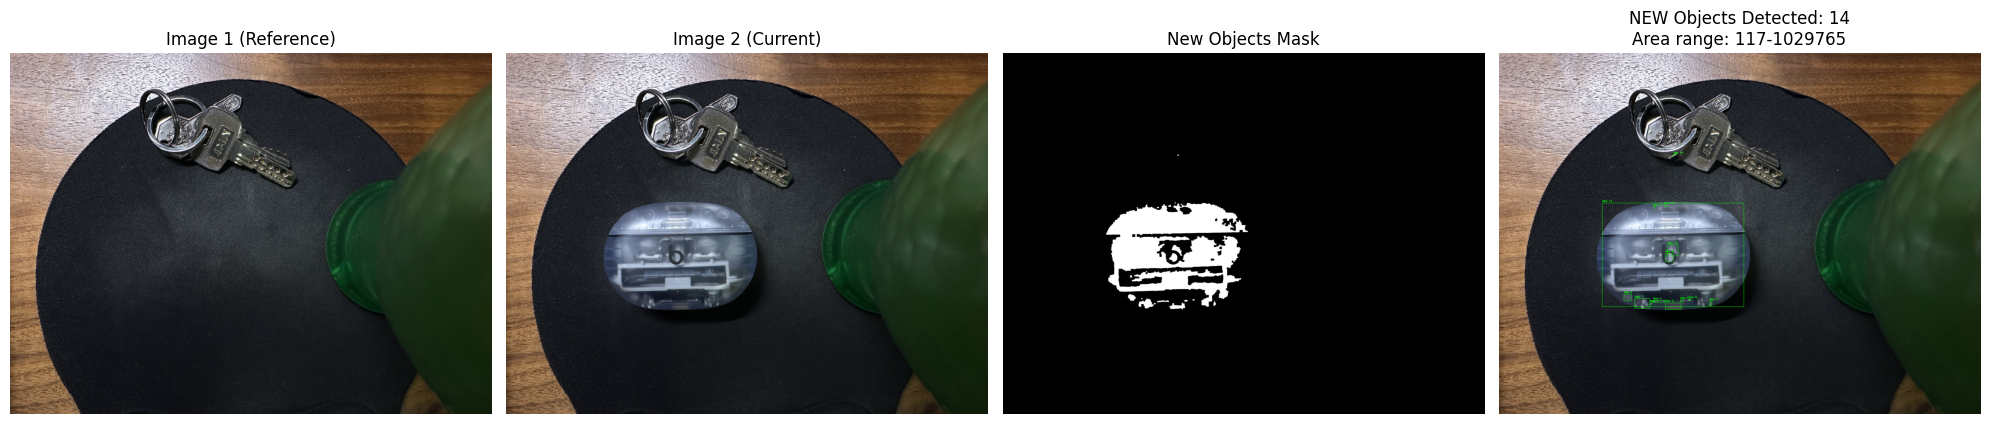

Detection Summary:
- Total new objects found: 14
- Area range: 117 - 1029765 pixels
- Object locations: [(1262, 2094, 15, 11), (1391, 2092, 132, 55), (1760, 2080, 21, 37), (1290, 2072, 99, 17), (1517, 2068, 29, 15), (1586, 2062, 17, 11), (1134, 2057, 127, 82), (1045, 2019, 65, 56), (1390, 1677, 69, 72), (1410, 1607, 88, 91), (1288, 1289, 17, 10), (1382, 1272, 23, 17), (863, 1256, 1185, 869), (1458, 851, 13, 9)]


In [8]:
imgV1 = mpimg.imread('data/data-substraction-sample/img-1.jpg')
imgV2 = mpimg.imread('data/data-substraction-sample/img-2.jpg')

# Ensure both images have the same shape for subtraction
if imgV1.shape != imgV2.shape:
    # Resize the second image to match the first
    imgV2_resized = cv2.resize(imgV2, (imgV1.shape[1], imgV1.shape[0]))
else:
    imgV2_resized = imgV2

# Convert to grayscale for better processing
if imgV1.ndim == 3:
    gray1 = cv2.cvtColor(imgV1, cv2.COLOR_RGB2GRAY)
else:
    gray1 = imgV1

if imgV2_resized.ndim == 3:
    gray2 = cv2.cvtColor(imgV2_resized, cv2.COLOR_RGB2GRAY)
else:
    gray2 = imgV2_resized

# Ensure 8-bit
if gray1.dtype != np.uint8:
    gray1 = cv2.normalize(gray1, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
if gray2.dtype != np.uint8:
    gray2 = cv2.normalize(gray2, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Detect NEW objects: objects that appear in img2 but not in img1
# Method: Find regions where img2 is significantly brighter than img1
diff_new = cv2.subtract(gray2, gray1)  # Only positive differences (new objects)

# Apply threshold to isolate new objects
_, mask_new = cv2.threshold(diff_new, 30, 255, cv2.THRESH_BINARY)  # Adjust threshold as needed

# Morphological operations to clean up the mask
kernel = np.ones((5, 5), np.uint8)
mask_clean = cv2.morphologyEx(mask_new, cv2.MORPH_OPEN, kernel, iterations=2)
mask_clean = cv2.morphologyEx(mask_clean, cv2.MORPH_CLOSE, kernel, iterations=3)

# Find contours of new objects
contours, _ = cv2.findContours(mask_clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter and draw bounding boxes for new objects
vis = imgV2_resized.copy()
if vis.ndim == 2:
    vis = cv2.cvtColor(vis, cv2.COLOR_GRAY2RGB)

new_objects = []
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    area = w * h
    if area < 100:  # Filter out very small objects
        continue
    new_objects.append((x, y, w, h))
    cv2.rectangle(vis, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green for new objects
    cv2.putText(vis, f'New {len(new_objects)}', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

# Summary metrics for new objects only
num_new_objects = len(new_objects)
areas = [w * h for (_, _, w, h) in new_objects]
area_min = min(areas) if areas else 0
area_max = max(areas) if areas else 0

# Visualization
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(imgV1)
axes[0].set_title('Image 1 (Reference)')
axes[0].axis('off')

axes[1].imshow(imgV2_resized)
axes[1].set_title('Image 2 (Current)')
axes[1].axis('off')

axes[2].imshow(mask_clean, cmap='gray')
axes[2].set_title('New Objects Mask')
axes[2].axis('off')

axes[3].imshow(vis)
axes[3].set_title(f'NEW Objects Detected: {num_new_objects}\nArea range: {area_min}-{area_max}')
axes[3].axis('off')

plt.tight_layout()
plt.show()

print(f"Detection Summary:")
print(f"- Total new objects found: {num_new_objects}")
print(f"- Area range: {area_min} - {area_max} pixels")
if new_objects:
    print(f"- Object locations: {new_objects}")
else:
    print("- No new objects detected")

### Justification and Demonstration
The justification for using gamma correction in astronomy is based on how pixels in an astronomical CCD camera capture light. In long-exposure images, faint objects such as nebulae and galaxies have very low pixel values compared to brighter stars. Applying gamma correction with a value greater than 1.0 increases the brightness of low-value pixels more than high-value pixels. This makes fainter structures more visible without saturating the stars.

The demonstration allows you to upload an image of a nebula or galaxy. Once uploaded, the code will process the image to apply the correction. The visual comparison of the original and corrected images illustrates how nearly invisible details in the darkness of space become much clearer and more defined.